In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'measurement variation')

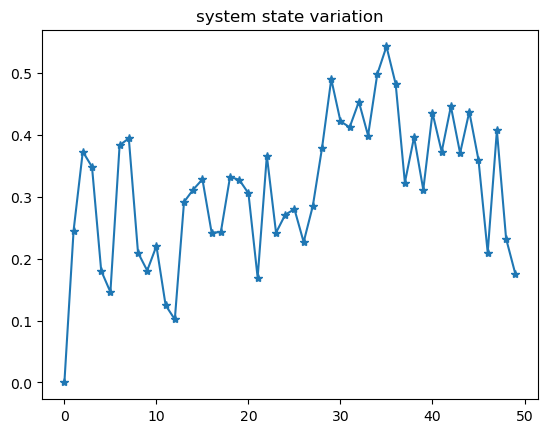

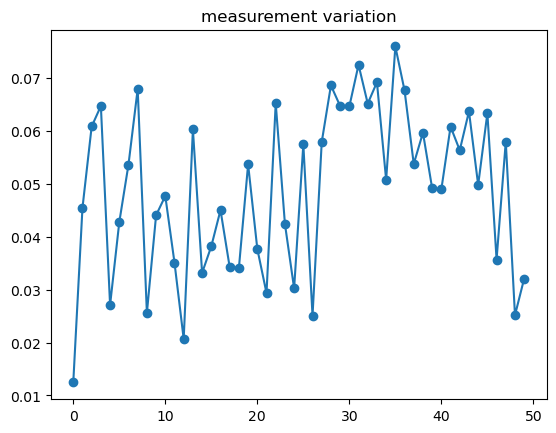

In [2]:
# Signal generation
N_length = 50 #signal length
Q = 0.1 #input('please input the process covariance')
R = 0.001 #input('please input the measurement covariance')
x = np.zeros(N_length) # initialize x
y = np.zeros(N_length) # initialize y
for i in range(N_length-1):
    x[i+1] = 0.5*x[i] + np.sqrt(Q)*np.random.rand(1) 
    y[i] = x[i]/10 + np.sqrt(R)*np.random.rand(1) 
y[-1] = x[-1]/10 + np.sqrt(R)*np.random.rand(1) # last measurment element

plt.plot(np.arange(50), x, marker='*')
plt.title('system state variation')
plt.figure()
plt.plot(np.arange(50), y, marker ='o' )
plt.title('measurement variation')

In [3]:
#Standard Kalman Filter
def KF(y, Q, R):
    x_estimate = np.zeros(len(y)) #predicted state
    y_estimate = np.zeros(len(y)) #predicted measurement
    K = 0 #Kalman gain
    P_estimate = np.ones(len(y))*Q #variance of the state
    for i in range(len(x)-1):
        x_estimate[i+1] = 0.5*x_estimate[i] #one-step ahead state prediction, don't consider the unit-to-unit noise
        P_estimate[i+1] = 0.5*P_estimate[i]*0.5 + Q #variance associated the predicted state
        y_estimate[i+1] = x_estimate[i+1]/10 #predicted measurement, don't consider measurement variance
        K = P_estimate[i+1]/(10*(1/10*P_estimate[i+1]*1/10 + R)) #Kalman gain
        x_estimate[i+1] = x_estimate[i+1] + K*(y[i+1]-y_estimate[i+1]) #update of the predicted state
        P_estimate[i+1] = (1-K/10)*P_estimate[i+1] #update of the predicted state variance
    
    return x_estimate      
    

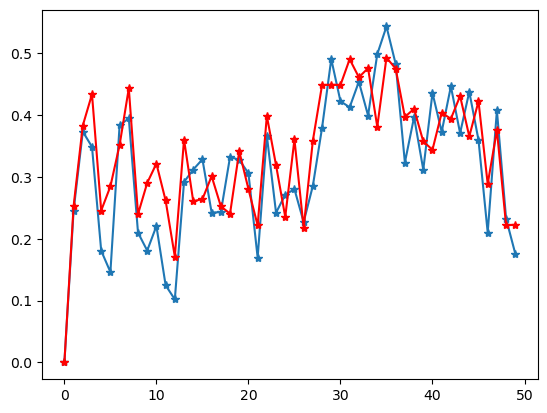

In [4]:
#tracking by Kalman filter
x_estimate = KF(y, Q, R)
plt.plot(np.arange(50), x, marker='*')
plt.plot(np.arange(50), x_estimate, 'r',marker='*')